# StreamRHF Implementation:
### Authors:
#### Cristian Alejandro CHÁVEZ BECERRA
#### Giovanni BENEDETTI DA ROSA

### Comparison on a random dataset

In this section we will generate a toy dataset to test the model and evaluate that the implementation and integration with CapyMOA is properly working

#### Generating the dataset

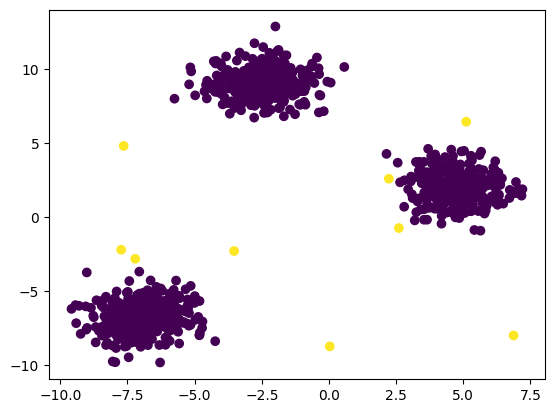

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from capymoa.stream import NumpyStream

# generate normal data points
n_samples = 1000
n_features = 2
n_clusters = 3
X, y = make_blobs(
    n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42
)

# generate anomalous data points
n_anomalies = int(n_samples/100)  # the anomaly rate is 1%
anomalies = np.random.uniform(low=-10, high=10, size=(n_anomalies, n_features))

# combine the normal data points with anomalies
X = np.vstack([X, anomalies])
y = np.hstack([y, [1] * n_anomalies])  # Label anomalies with 1
y[:n_samples] = 0  # Label normal points with 0

# shuffle the data
idx = np.random.permutation(n_samples + n_anomalies)
X = X[idx]
y = y[idx]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
plt.show()

# create a NumpyStream from the combined dataset
feature_names = [f"feature_{i}" for i in range(n_features)]
target_name = "class"

window_size = int(n_samples/10)

#### Evaluating StreamRHF on the dataset

#### Comparison with the models

Now, once we know we could integrate the class with CapyMOA and properly run it as the other classes we will do a comparison of the AUC score with the other 4 models of CapyMOA tailoredfor Anomaly Detection. We will evaluate them in the following order:

-HalfSpaceTrees

-Autoencoder

-OnlineIsolationForest

-StreamRHF

##### HalfSpaceTrees

AUC: 0.9517


,instances,auc,s_auc,Accuracy,Kappa,Periodical holdout AUC,Pos/Neg ratio,G-Mean,Recall,KappaM
0,100.0,1.000000,1.000000,0.52,0.0,0.000000,0.000000,NaN,NaN,-inf
1,200.0,1.000000,1.000000,0.00,0.0,1.000000,0.000000,NaN,NaN,-inf
2,300.0,1.000000,0.224542,0.01,0.0,1.000000,0.010101,0.0,1.0,-296.000000
3,400.0,1.000000,1.000000,0.00,0.0,1.000000,0.000000,NaN,NaN,-399.000000
4,500.0,1.000000,0.277056,0.01,0.0,1.000000,0.010101,0.0,1.0,-246.500000
5,600.0,0.979592,0.213073,0.02,0.0,1.000000,0.020408,0.0,1.0,-146.000000
6,700.0,0.948980,0.152594,0.02,0.0,0.979592,0.020408,0.0,1.0,-113.333333
7,800.0,1.000000,1.000000,0.00,0.0,0.948980,0.000000,NaN,NaN,-132.333333
8,900.0,1.000000,0.199914,0.01,0.0,1.000000,0.010101,0.0,1.0,-126.285714
9,1000.0,0.962199,0.229797,0.03,0.0,1.000000,0.030928,0.0,1.0,-96.000000


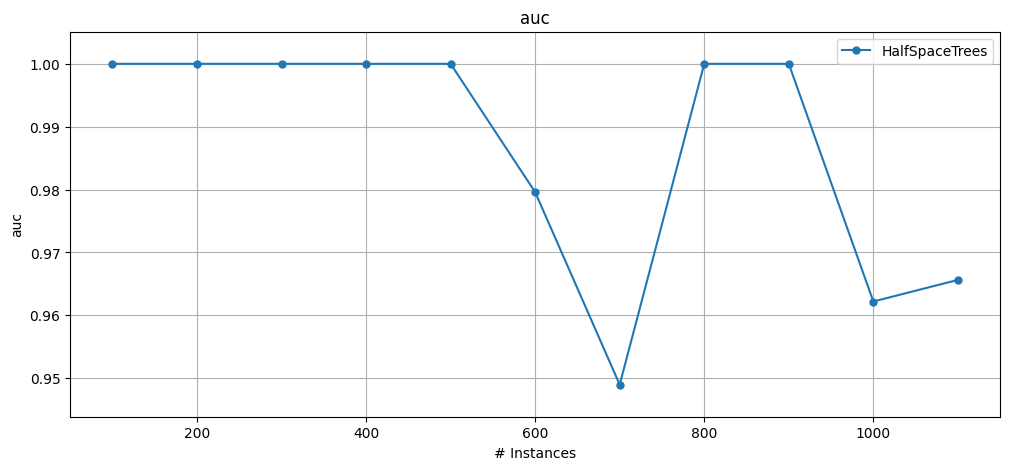

In [2]:
from capymoa.evaluation.visualization import plot_windowed_results
from capymoa.anomaly import HalfSpaceTrees, Autoencoder,OnlineIsolationForest, StreamRHF
from capymoa.evaluation import prequential_evaluation_anomaly

stream_ad = NumpyStream(
    X,
    y,
    dataset_name="AnomalyDetectionDataset",
    feature_names=feature_names,
    target_name=target_name,
    target_type="categorical",
)
hst = HalfSpaceTrees(schema=stream_ad.get_schema())

results_hst = prequential_evaluation_anomaly(
    stream=stream_ad, learner=hst, window_size=window_size
)

print(f"AUC: {results_hst.auc()}")
display(results_hst.windowed.metrics_per_window())
plot_windowed_results(results_hst, metric="auc", save_only=False)

##### Autoencoder

AUC: 0.364


,instances,auc,s_auc,Accuracy,Kappa,Periodical holdout AUC,Pos/Neg ratio,G-Mean,Recall,KappaM
0,100.0,1.000000,1.000000,0.00,0.0,0.000000,0.000000,NaN,NaN,-inf
1,200.0,1.000000,1.000000,0.00,0.0,1.000000,0.000000,NaN,NaN,-inf
2,300.0,0.757576,-0.242336,0.01,0.0,1.000000,0.010101,0.0,1.0,-296.000000
3,400.0,1.000000,1.000000,0.00,0.0,0.757576,0.000000,NaN,NaN,-399.000000
4,500.0,0.707071,-0.291422,0.01,0.0,1.000000,0.010101,0.0,1.0,-246.500000
5,600.0,0.285714,0.000337,0.02,0.0,0.707071,0.020408,0.0,1.0,-146.000000
6,700.0,0.484694,-0.132089,0.02,0.0,0.285714,0.020408,0.0,1.0,-113.333333
7,800.0,1.000000,1.000000,0.00,0.0,0.484694,0.000000,NaN,NaN,-132.333333
8,900.0,0.020202,0.000295,0.01,0.0,1.000000,0.010101,0.0,1.0,-126.285714
9,1000.0,0.286942,-0.003432,0.03,0.0,0.020202,0.030928,0.0,1.0,-96.000000


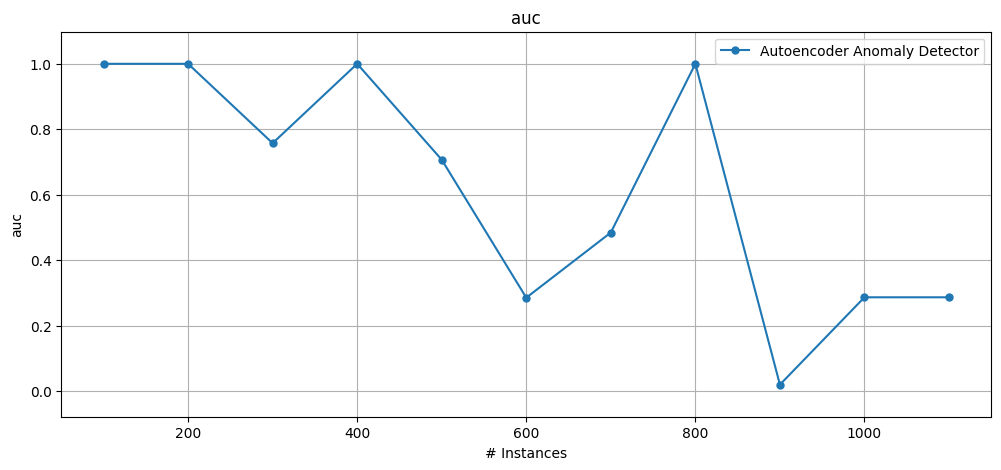

In [3]:
ae = Autoencoder(schema=stream_ad.get_schema(), hidden_layer=1)

results_ae = prequential_evaluation_anomaly(
    stream=stream_ad, learner=ae, window_size=window_size
)

print(f"AUC: {results_ae.auc()}")
display(results_ae.windowed.metrics_per_window())
plot_windowed_results(results_ae, metric="auc", save_only=False)

##### OnlineIsolationForest

AUC: 0.4194


,instances,auc,s_auc,Accuracy,Kappa,Periodical holdout AUC,Pos/Neg ratio,G-Mean,Recall,KappaM
0,100.0,1.000000,1.000000,0.33,0.000000,0.000000,0.000000,NaN,NaN,-inf
1,200.0,1.000000,1.000000,0.00,0.000000,1.000000,0.000000,NaN,NaN,-inf
2,300.0,0.313131,0.009208,0.01,0.000000,1.000000,0.010101,0.000000,1.000000,-296.000000
3,400.0,1.000000,1.000000,0.00,0.000000,0.313131,0.000000,NaN,NaN,-399.000000
4,500.0,0.757576,0.032713,0.01,0.000000,1.000000,0.010101,0.000000,1.000000,-246.500000
5,600.0,0.489796,0.023803,0.02,0.000000,0.757576,0.020408,0.000000,1.000000,-146.000000
6,700.0,0.352041,0.023178,0.06,0.001699,0.489796,0.020408,0.202031,1.000000,-108.666667
7,800.0,1.000000,1.000000,0.02,0.000000,0.352041,0.000000,NaN,NaN,-129.666667
8,900.0,0.040404,0.000134,0.05,-0.020189,1.000000,0.010101,0.000000,0.000000,-121.142857
9,1000.0,0.546392,0.019222,0.05,-0.018876,0.040404,0.030928,0.143592,0.666667,-94.000000


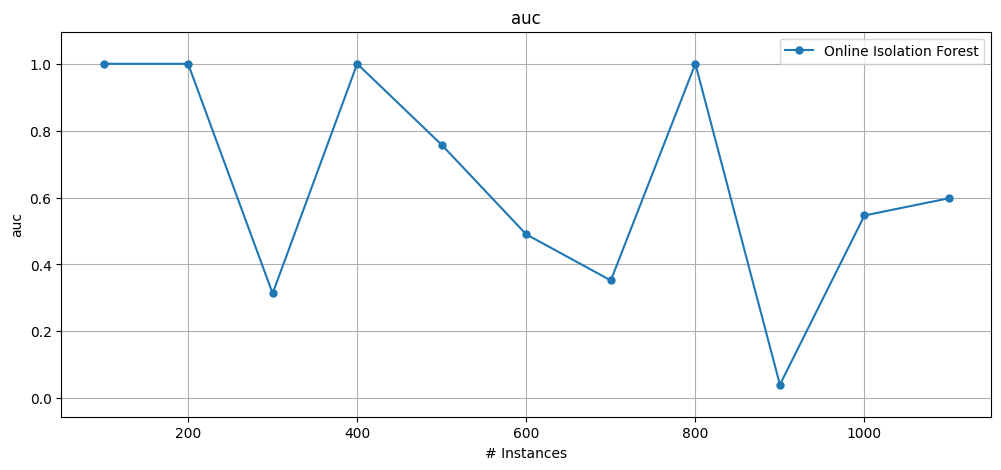

In [4]:
oif = OnlineIsolationForest(schema=stream_ad.get_schema(), num_trees=10)

results_oif = prequential_evaluation_anomaly(
    stream=stream_ad, learner=oif, window_size=window_size
)

print(f"AUC: {results_oif.auc()}")
display(results_oif.windowed.metrics_per_window())
plot_windowed_results(results_oif, metric="auc", save_only=False)

##### StreamRHF

our StreamRHF initialized
20
AUC: 0.7647


,instances,auc,s_auc,Accuracy,Kappa,Periodical holdout AUC,Pos/Neg ratio,G-Mean,Recall,KappaM
0,100.0,1.000000,1.000000,0.00,0.000000,0.000000,0.000000,NaN,NaN,-inf
1,200.0,1.000000,1.000000,0.00,0.000000,1.000000,0.000000,NaN,NaN,-inf
2,300.0,0.939394,0.145977,0.01,0.000000,1.000000,0.010101,0.000000,1.0,-296.000000
3,400.0,1.000000,1.000000,0.01,0.000000,0.939394,0.000000,NaN,NaN,-395.000000
4,500.0,0.676768,0.089018,0.01,0.000000,1.000000,0.010101,0.000000,1.0,-246.500000
5,600.0,0.530612,0.067869,0.02,0.000000,0.676768,0.020408,0.000000,1.0,-146.000000
6,700.0,0.808673,0.132544,0.02,0.000000,0.530612,0.020408,0.000000,1.0,-113.333333
7,800.0,1.000000,1.000000,0.03,0.000000,0.808673,0.000000,NaN,NaN,-128.333333
8,900.0,0.964646,0.155642,0.02,0.000204,1.000000,0.010101,0.100504,1.0,-125.000000
9,1000.0,0.860825,0.118108,0.03,0.000000,0.964646,0.030928,0.000000,1.0,-96.000000


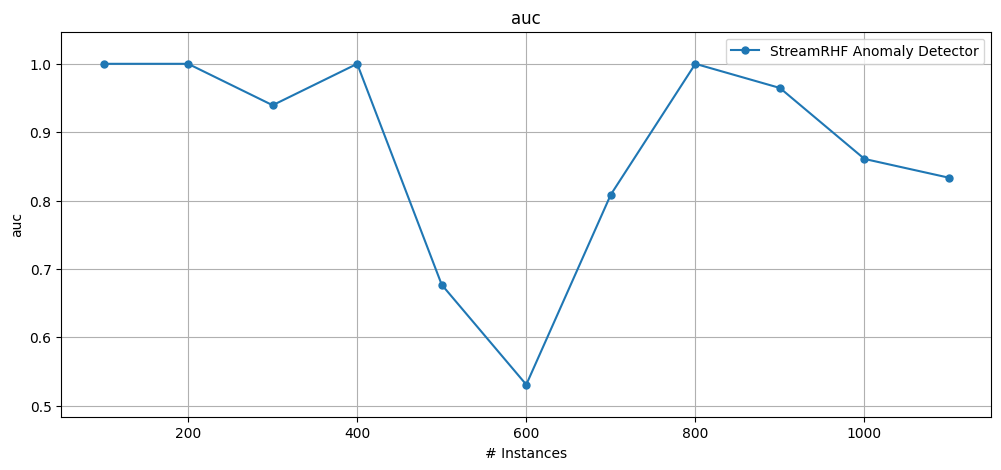

In [5]:
streamrhf = StreamRHF(schema=stream_ad.get_schema(), num_trees=10)

results_streamrhf = prequential_evaluation_anomaly(
    stream=stream_ad, learner=streamrhf, window_size=window_size
)

print(f"AUC: {results_streamrhf.auc()}")
display(results_streamrhf.windowed.metrics_per_window())
plot_windowed_results(results_streamrhf, metric="auc", save_only=False)

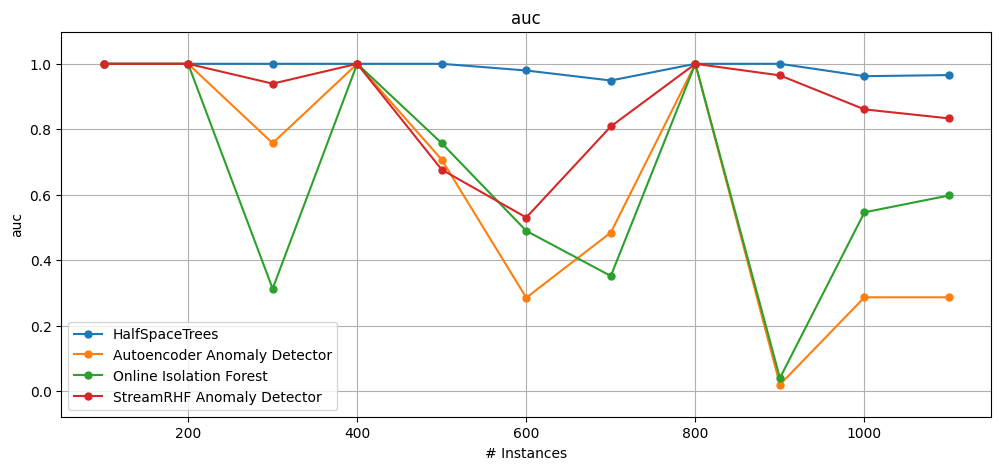

In [6]:
plot_windowed_results(
    results_hst, results_ae, results_oif, results_streamrhf, metric="auc", save_only=False
)

### Comparison on a Capymoa dataset

our StreamRHF initialized
20
HalfSpaceTrees AUC: 0.5358045479630744


,instances,auc,s_auc,Accuracy,Kappa,Periodical holdout AUC,Pos/Neg ratio,G-Mean,Recall,KappaM
0,100.0,0.360963,-5.469677e-02,0.38,-0.256078,0.000000,0.515152,0.353238,0.294118,-1.000000
1,200.0,1.000000,9.095907e-02,0.65,0.000000,0.360963,1.857143,0.000000,1.000000,0.239130
2,300.0,0.000000,6.852733e-17,0.78,-0.019462,1.000000,0.265823,0.000000,0.000000,0.503759
3,400.0,0.999576,1.285029e-01,0.44,0.075297,0.000000,1.631579,0.311086,0.096774,-0.114428
4,500.0,0.021277,1.740649e-03,0.53,0.000000,0.999576,0.886792,0.000000,0.000000,0.116541
5,600.0,0.039898,3.046055e-04,0.62,0.000000,0.021277,0.612903,0.000000,0.000000,0.242525
6,700.0,0.454393,1.305614e-02,0.39,0.000000,0.039898,1.564103,0.000000,0.000000,-0.213068
7,800.0,0.001224,8.321978e-06,0.43,0.000000,0.454393,1.325581,0.000000,0.000000,-0.154430
8,900.0,0.000404,6.464646e-07,0.45,0.000000,0.001224,1.222222,0.000000,0.000000,-0.109865
9,1000.0,0.034219,4.239513e-04,0.46,0.000000,0.000404,1.173913,0.000000,0.000000,-0.077844


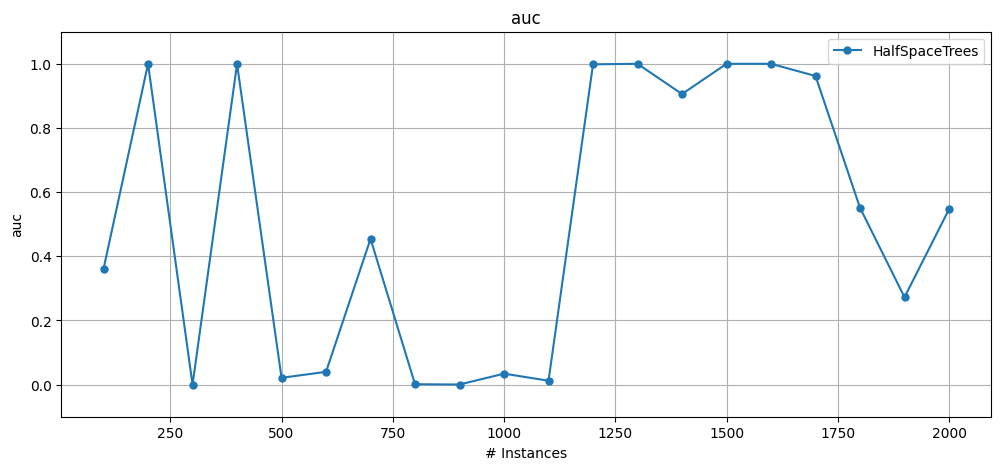

Autoencoder AUC: 0.423365484313332


,instances,auc,s_auc,Accuracy,Kappa,Periodical holdout AUC,Pos/Neg ratio,G-Mean,Recall,KappaM
0,100.0,0.736631,0.021084,0.66,0.0,0.000000,0.515152,0.0,0.0,-0.096774
1,200.0,0.288352,0.004165,0.35,0.0,0.736631,1.857143,0.0,0.0,-0.413043
2,300.0,0.499699,0.008380,0.79,0.0,0.288352,0.265823,0.0,0.0,0.526316
3,400.0,0.123939,0.001208,0.38,0.0,0.499699,1.631579,0.0,0.0,-0.233831
4,500.0,0.653553,0.012236,0.53,0.0,0.123939,0.886792,0.0,0.0,0.116541
5,600.0,0.193548,0.002075,0.62,0.0,0.653553,0.612903,0.0,0.0,0.242525
6,700.0,0.186633,0.002319,0.39,0.0,0.193548,1.564103,0.0,0.0,-0.213068
7,800.0,0.502652,0.008293,0.43,0.0,0.186633,1.325581,0.0,0.0,-0.154430
8,900.0,0.368081,0.006007,0.45,0.0,0.502652,1.222222,0.0,0.0,-0.109865
9,1000.0,0.287440,0.003519,0.46,0.0,0.368081,1.173913,0.0,0.0,-0.077844


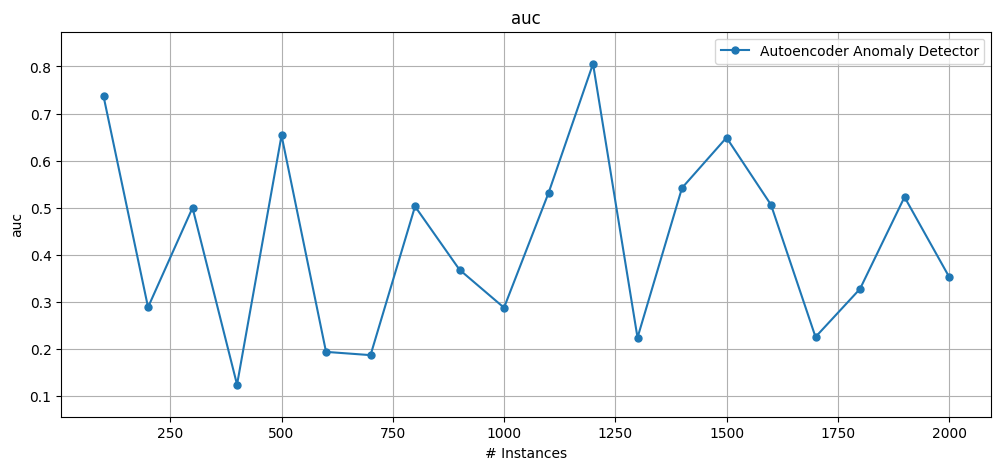

OnlineIsolationForest AUC: 0.5189425296006421


,instances,auc,s_auc,Accuracy,Kappa,Periodical holdout AUC,Pos/Neg ratio,G-Mean,Recall,KappaM
0,100.0,0.416667,0.155893,0.37,-0.136364,0.000000,0.515152,0.390393,0.558824,-1.032258
1,200.0,0.568791,0.020393,0.65,0.000000,0.416667,1.857143,0.000000,1.000000,0.239130
2,300.0,0.587101,0.006772,0.21,0.000000,0.568791,0.265823,0.000000,1.000000,-0.781955
3,400.0,0.700764,0.006075,0.62,0.000000,0.587101,1.631579,0.000000,1.000000,0.243781
4,500.0,0.458450,0.002215,0.47,0.000000,0.700764,0.886792,0.000000,1.000000,0.003759
5,600.0,0.300509,0.001740,0.38,0.000000,0.458450,0.612903,0.000000,1.000000,-0.235880
6,700.0,0.461538,0.001429,0.61,0.000000,0.300509,1.564103,0.000000,1.000000,0.224432
7,800.0,0.643819,0.001934,0.57,0.000000,0.461538,1.325581,0.000000,1.000000,0.129114
8,900.0,0.354747,0.000667,0.55,0.000000,0.643819,1.222222,0.000000,1.000000,0.091928
9,1000.0,0.210950,0.000281,0.54,0.000000,0.354747,1.173913,0.000000,1.000000,0.081836


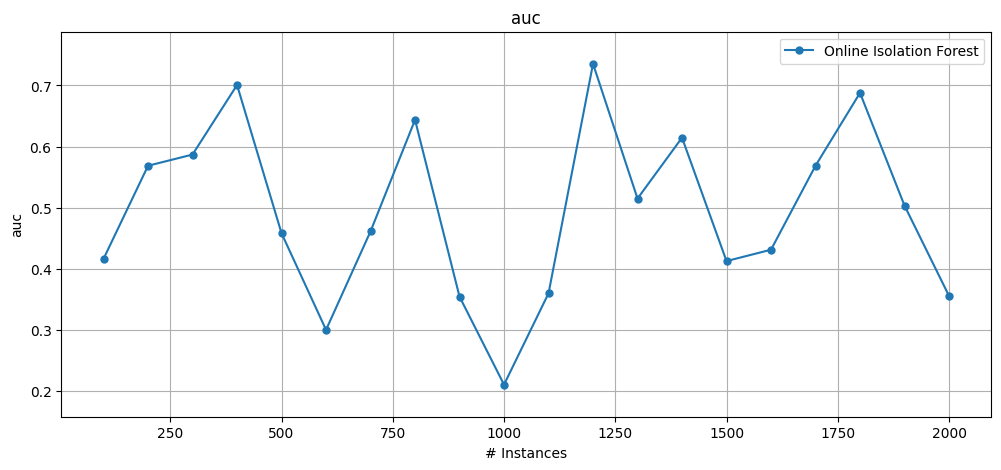

StreamRHF AUC: 0.6979312997524918


,instances,auc,s_auc,Accuracy,Kappa,Periodical holdout AUC,Pos/Neg ratio,G-Mean,Recall,KappaM
0,100.0,0.706996,0.108133,0.33,-0.020097,0.000000,0.515152,0.000000,0.970588,-1.161290
1,200.0,0.556703,0.059716,0.65,0.000000,0.706996,1.857143,0.000000,1.000000,0.239130
2,300.0,0.823990,0.140822,0.22,0.005356,0.556703,0.265823,0.112509,1.000000,-0.759398
3,400.0,0.508489,0.054962,0.62,0.000000,0.823990,1.631579,0.000000,1.000000,0.243781
4,500.0,0.688880,0.107760,0.48,0.017756,0.508489,0.886792,0.137361,1.000000,0.022556
5,600.0,0.528862,0.067283,0.38,0.000000,0.688880,0.612903,0.000000,1.000000,-0.235880
6,700.0,0.408785,0.038696,0.60,-0.019888,0.528862,1.564103,0.000000,0.983607,0.204545
7,800.0,0.289678,0.024288,0.56,-0.019935,0.408785,1.325581,0.000000,0.982456,0.108861
8,900.0,0.566667,0.059632,0.55,0.000000,0.289678,1.222222,0.000000,1.000000,0.091928
9,1000.0,0.765298,0.123063,0.54,0.000000,0.566667,1.173913,0.000000,1.000000,0.081836


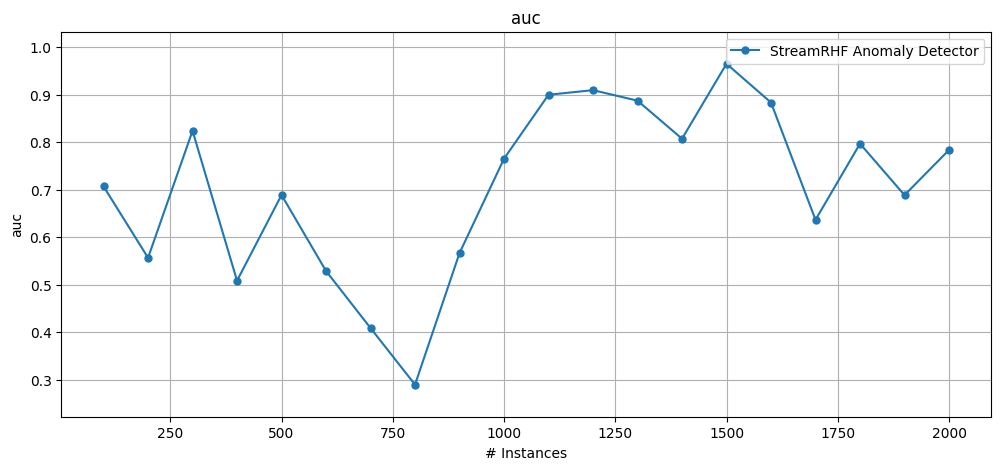

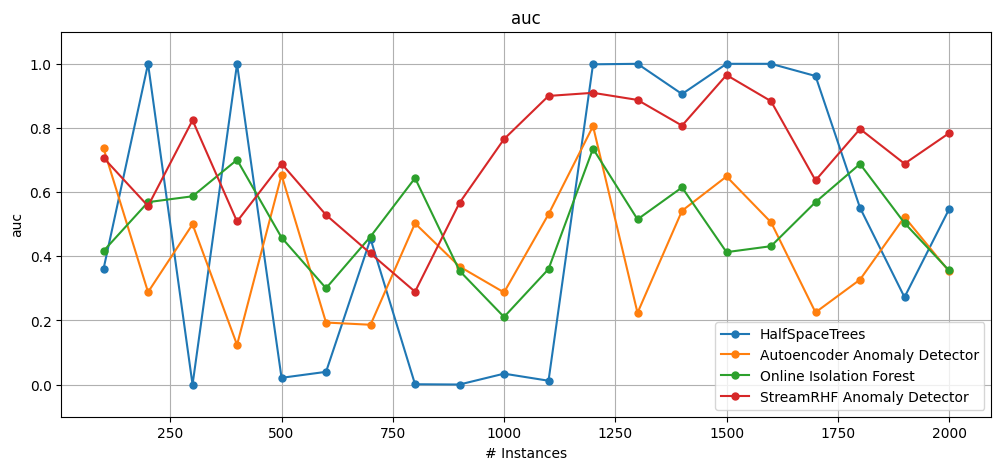

In [12]:
from capymoa.datasets import ElectricityTiny
from capymoa.evaluation.visualization import plot_windowed_results
from capymoa.anomaly import HalfSpaceTrees, Autoencoder, OnlineIsolationForest, StreamRHF
from capymoa.evaluation import prequential_evaluation_anomaly

# Load the ElectricityTiny dataset stream
stream = ElectricityTiny()
schema = stream.get_schema()

# Initialize models
hst = HalfSpaceTrees(schema=schema)
ae = Autoencoder(schema=schema, hidden_layer=1)
oif = OnlineIsolationForest(schema=schema, num_trees=10)
streamrhf = StreamRHF(schema=schema, num_trees=10)

# Run prequential evaluation for each model
results_hst = prequential_evaluation_anomaly(stream=stream, learner=hst, window_size=100)
print(f"HalfSpaceTrees AUC: {results_hst.auc()}")
display(results_hst.windowed.metrics_per_window())
plot_windowed_results(results_hst, metric="auc", save_only=False)

results_ae = prequential_evaluation_anomaly(stream=stream, learner=ae, window_size=100)
print(f"Autoencoder AUC: {results_ae.auc()}")
display(results_ae.windowed.metrics_per_window())
plot_windowed_results(results_ae, metric="auc", save_only=False)

results_oif = prequential_evaluation_anomaly(stream=stream, learner=oif, window_size=100)
print(f"OnlineIsolationForest AUC: {results_oif.auc()}")
display(results_oif.windowed.metrics_per_window())
plot_windowed_results(results_oif, metric="auc", save_only=False)

results_streamrhf = prequential_evaluation_anomaly(stream=stream, learner=streamrhf, window_size=100)
print(f"StreamRHF AUC: {results_streamrhf.auc()}")
display(results_streamrhf.windowed.metrics_per_window())
plot_windowed_results(results_streamrhf, metric="auc", save_only=False)

# Plot final comparison of all models
plot_windowed_results(
    results_hst, results_ae, results_oif, results_streamrhf, metric="auc", save_only=False
)


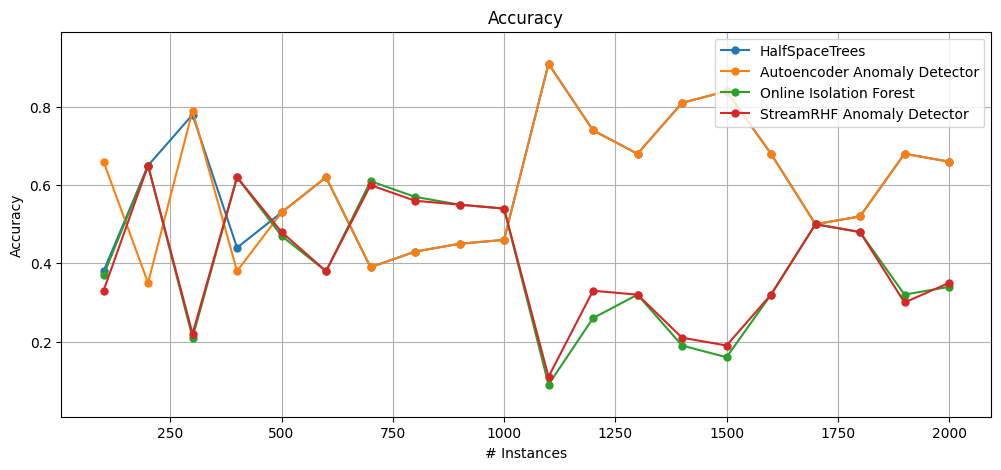

In [15]:
# Plot final comparison of all models
plot_windowed_results(
    results_hst, results_ae, results_oif, results_streamrhf, metric="Accuracy", save_only=False
)

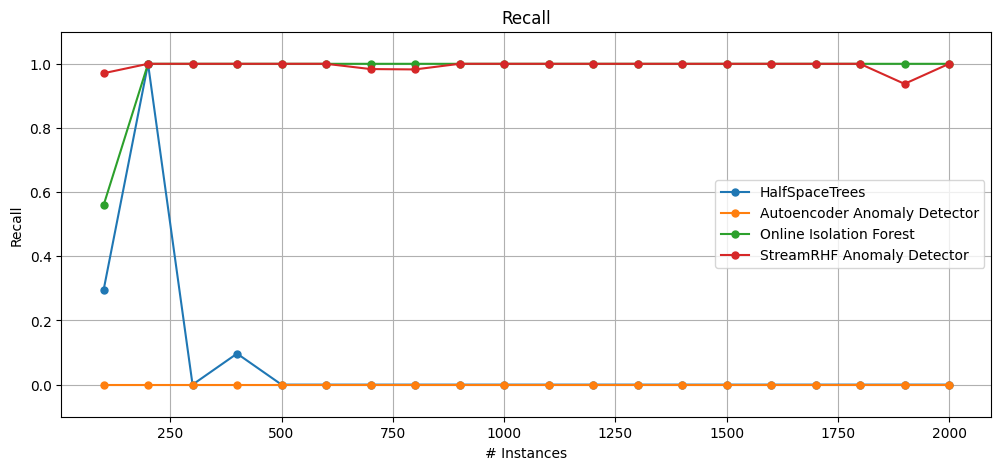

In [16]:
# Plot final comparison of all models
plot_windowed_results(
    results_hst, results_ae, results_oif, results_streamrhf, metric="Recall", save_only=False
)

### Comparison with the AP score

Since AP score was used in the paper, even though the metric is not in CapyMOA we decided that it would be a good comparison to do

our StreamRHF initialized
20
Evaluating HalfSpaceTrees...
Evaluating Autoencoder...
Evaluating OnlineIsolationForest...
Evaluating StreamRHF...


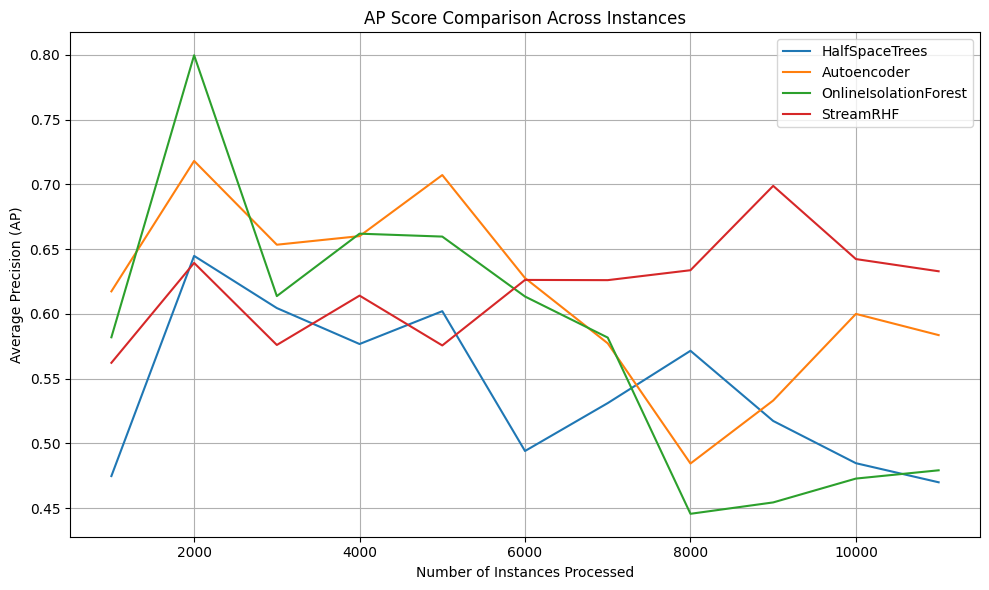

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from capymoa.datasets import Electricity
from capymoa.anomaly import HalfSpaceTrees, Autoencoder, OnlineIsolationForest, StreamRHF

# Initialize dataset stream
stream = Electricity()
schema = stream.get_schema()

# Limit the number of instances to 11,000
max_instances = 11000
window_size = 1000  # Sliding window size

# Initialize models
models = {
    "HalfSpaceTrees": HalfSpaceTrees(schema=schema),
    "Autoencoder": Autoencoder(schema=schema, hidden_layer=1),
    "OnlineIsolationForest": OnlineIsolationForest(schema=schema, num_trees=10),
    "StreamRHF": StreamRHF(schema=schema, num_trees=10),
}

# Initialize results
ap_scores_per_model = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Restart the stream for each model
    stream.restart()
    anomaly_scores = []
    true_labels = []
    window_ap_scores = []
    instance_count = 0
    processed_instances = 0

    # Process instances in the stream
    while processed_instances < max_instances and stream.has_more_instances():
        instance = stream.next_instance()
        true_labels.append(instance.y_index)
        anomaly_score = 1 - model.score_instance(instance)  # Flip score for consistency
        anomaly_scores.append(anomaly_score)
        model.train(instance)
        instance_count += 1
        processed_instances += 1

        # Compute AP score every 1000 instances using the last 1000
        if instance_count == window_size:
            window_labels = np.array(true_labels[-window_size:])
            window_scores = np.array(anomaly_scores[-window_size:])
            window_ap = average_precision_score(window_labels, window_scores)
            window_ap_scores.append(window_ap)
            instance_count = 0  # Reset window counter

    ap_scores_per_model[model_name] = window_ap_scores

# Plotting AP Scores
plt.figure(figsize=(10, 6))
for model_name, ap_scores in ap_scores_per_model.items():
    # Scale x-axis to reflect the total number of instances
    x_values = np.arange(window_size, len(ap_scores) * window_size + 1, window_size)
    plt.plot(x_values, ap_scores, label=model_name)

plt.title("AP Score Comparison Across Instances")
plt.xlabel("Number of Instances Processed")
plt.ylabel("Average Precision (AP)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
